# Assignment 1

1. Compare word frequencies between two works of a single author.
1. Compare word frequencies between works of two authors.
1. Are there some words preferred by one author but used less frequently by another author?

Extra credit

1. The frequency of a specific word, e.g., "would" should follow a binomial distribution (each regular word in a document is a trial and with probability p that word is "would". The estimate for p is N("would")/N(regular word)). Do these binomial distributions for your chosen word differ significantly between books of the same author or between authors? 

Project Gutenberg is a good source of for fiction and non-fiction.

E.g below are two most popular books from Project Gutenberg:
- Pride and Prejudice at http://www.gutenberg.org/ebooks/1342.txt.utf-8
- Adventures of Huckleberry Finn at http://www.gutenberg.org/ebooks/76.txt.utf-8

# 1. single author: Using Mark Goldstein with two differen lens reviews of the same lens but different brands


Samyang(offbrand)
samyang : 15
24-70mm : 15
af : 14
f2.8 : 14
24mm : 9
70mm : 9
rating : 6
focal : 6
both : 5
focus : 5
main : 4
star : 4
use : 4
sony : 4
alpha : 4
also : 4
length : 4
set : 4
not : 4
cameras : 3
ease : 3
sharpness: : 3
comment : 3
zoom : 3
3 : 3


Sony(OEM)
sony : 17
24-70mm : 15
f2.8 : 15
70mm : 12
24mm : 11
very : 9
also : 8
focal : 8
rating : 7
zoom : 7
length : 6
focusing : 6
star : 5
use : 5
two : 5
focus : 5
either : 5
aperture : 5
main : 4
standard : 4
alpha : 4
both : 4
switch : 4
more : 4
cameras : 3


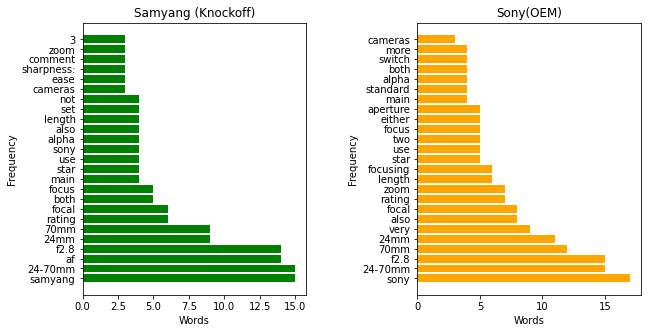

In [2]:
import matplotlib.pyplot as plt 
import requests, re
from bs4 import BeautifulSoup
from collections import Counter


def make_graph(article1, article2):
     
    fig, (ax1, ax2)  = plt.subplots(1, 2, figsize=(10,5)) #makes two plots with it being max width
    ax1.barh([wordCount[0] for wordCount in article1], [wordCount[1] for wordCount in article1], color='green')#
    ax2.barh([wordCount[0] for wordCount in article2], [wordCount[1] for wordCount in article2], color='orange')#
    ax1.set_title('Samyang (Knockoff)')
    ax2.set_title('Sony(OEM)')   
    ax1.set(xlabel='Words', ylabel='Frequency')
    ax2.set(xlabel='Words', ylabel='Frequency')
    #move the distance between the two subplots
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)
    plt.show()

def freq_checker(all_articles):
    freqs = [] #so an array of two dicts
    for i in range(len(all_articles)):
        c = Counter(all_articles[i])#dictionary of words and their counts
        freqs.append(c)
    return freqs


def parse(articles):
    articles_words = [] #2d array with first element being the words array for first book
    to_remove = {
        "with": 0,
        "the": 0,
        "a": 0,
        "on": 0,
        "of": 0,
        "to": 0,
        "and": 0,
        "an": 0,
        "for": 0,
        ".\n": 0,
        ".": 0,
        "it": 0,
        "is": 0,
        "in": 0,
        "at": 0,
        "ii": 0,
        "lens": 0,
        "/": 0,
        "which": 0,
        "it's": 0,
        "when": 0,
        "as": 0,
        "review": 0,
        "this": 0,
        "that": 0,
        "review": 0,
        "has": 0,
        "or": 0,
        "·": 0,
        "be": 0,
        "gm": 0,
        "fe": 0,
        "you": 0,
        "we": 0,
        "by": 0,
        "can": 0,
        "will": 0,
        "are": 0,
        "|" : 0
    }
    for book in articles:
        r = requests.get(book)
        soup = BeautifulSoup(r.text, 'html.parser')#soup now contains all the html code
        text = soup.get_text().lower()
        words = re.split('\s+', text)#split on whitespace

        for i in range(len(words)):
            #replace unwanted chars
            words[i] = words[i].strip()#bc replaced earlier with space so remove whitespace now
            
            #remove common words 
            finalWords = [word for word in words if word not in to_remove]
            
        articles_words.append(finalWords)
    return articles_words


if __name__ == "__main__":
    articles = []
    article1 = 'https://www.photographyblog.com/reviews/samyang_af_24_70mm_f2_8_fe_review' #chrismtas carol
    article2 = 'https://www.photographyblog.com/reviews/sony_fe_24_70mm_f2_8_gm_ii_review' #great expectations
    articles.append(article1)
    articles.append(article2)
    all_words = parse(articles)
    freqs = freq_checker(all_words)
    print("\nSamyang(offbrand)")
    for keyVal in freqs[0].most_common(25):
        print(keyVal[0], ":", keyVal[1])
    print('\n\nSony(OEM)')
    for keyVal in freqs[1].most_common(25):
        print(keyVal[0], ":", keyVal[1])
        
    make_graph(freqs[0].most_common(25), freqs[1].most_common(25))
    


# #2. Different authors reviewing camera bodies


Mark Goldstein
iso : 286
original : 244
(35mm) : 239
f/4 : 126
160 : 88
180mm : 80
x-h2s : 72
fujifilm : 69
1/180s : 60
shutter : 57
movie : 45
f/8 : 45
video : 43
speed : 43
shooting : 41
sample : 40
1/2000s : 40
image : 37
also : 36
recording : 35
af : 35
4:2:2 : 35
approx. : 32
sensor : 31
f/5.6 : 31


Amy Davies
iso : 128
original : 95
(35mm) : 84
nikon : 63
100 : 62
movie : 58
z7 : 55
sample : 54
f/4 : 37
af : 32
also : 31
f/5.6 : 27
use : 24
images : 24
(100% : 24
crop) : 24
image : 23
24mm : 22
video : 21
shooting : 21
20mm : 21
viewfinder : 20
quality : 19
mode : 19
card : 18


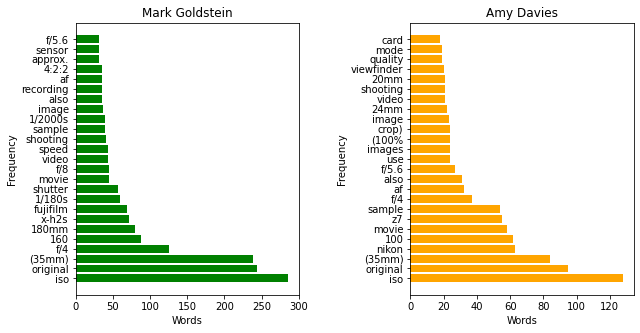

In [3]:
import matplotlib.pyplot as plt 
import requests, re
from bs4 import BeautifulSoup
from collections import Counter


def make_graph(article1, article2):
     
    fig, (ax1, ax2)  = plt.subplots(1, 2, figsize=(10,5)) #makes two plots with it being max width
    ax1.barh([wordCount[0] for wordCount in article1], [wordCount[1] for wordCount in article1], color='green')#
    ax2.barh([wordCount[0] for wordCount in article2], [wordCount[1] for wordCount in article2], color='orange')#
    ax1.set_title('Mark Goldstein')
    ax2.set_title('Amy Davies')   
    ax1.set(xlabel='Words', ylabel='Frequency')
    ax2.set(xlabel='Words', ylabel='Frequency')
    #move the distance between the two subplots
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)
    plt.show()

def freq_checker(all_articles):
    freqs = [] #so an array of two dicts
    for i in range(len(all_articles)):
        c = Counter(all_articles[i])#dictionary of words and their counts
        freqs.append(c)
    return freqs


def parse(articles):
    articles_words = [] #2d array with first element being the words array for first book
    to_remove = {
        "with": 0,
        "the": 0,
        "a": 0,
        "on": 0,
        "of": 0,
        "to": 0,
        "and": 0,
        "an": 0,
        "for": 0,
        ".\n": 0,
        ".": 0,
        "it": 0,
        "is": 0,
        "in": 0,
        "at": 0,
        "ii": 0,
        "lens": 0,
        "/": 0,
        "which": 0,
        "it's": 0,
        "when": 0,
        "as": 0,
        "review": 0,
        "this": 0,
        "that": 0,
        "review": 0,
        "has": 0,
        "or": 0,
        "·": 0,
        "be": 0,
        "gm": 0,
        "fe": 0,
        "you": 0,
        "we": 0,
        "by": 0,
        "can": 0,
        "will": 0,
        "are": 0,
        "|" : 0,
        "have" : 0,
        "camera" : 0,
        "x" : 0,
        "new" : 0,
        "-" : 0,
        "z" : 0,
        "download" : 0,
        "up" : 0,
        "if" : 0,
        "-" : 0,
        "from" : 0,
        "but" : 0
    }
    for book in articles:
        r = requests.get(book)
        soup = BeautifulSoup(r.text, 'html.parser')#soup now contains all the html code
        text = soup.get_text().lower()
        words = re.split('\s+', text)#split on whitespace

        for i in range(len(words)):
            #replace unwanted chars
            words[i] = words[i].strip()#bc replaced earlier with space so remove whitespace now
            
            #remove common words 
            finalWords = [word for word in words if word not in to_remove]
            
        articles_words.append(finalWords)
    return articles_words


if __name__ == "__main__":
    articles = []
    article1 = 'https://www.photographyblog.com/reviews/fujifilm_x_h2s_review'#mark 
    article2 = 'https://www.photographyblog.com/reviews/nikon_z7_ii_review'#amy 
    articles.append(article1)
    articles.append(article2)
    all_words = parse(articles)
    freqs = freq_checker(all_words)
    print("\nMark Goldstein")
    for keyVal in freqs[0].most_common(25):
        print(keyVal[0], ":", keyVal[1])
    print('\n\nAmy Davies')
    for keyVal in freqs[1].most_common(25):
        print(keyVal[0], ":", keyVal[1])
        
    make_graph(freqs[0].most_common(25), freqs[1].most_common(25))
    


# #3. Comparing authors' words
